주어진 데이터셋을 차원 축소한 뒤 **다양한 알고리즘**을 적용하여 클러스터링을 진행하고, 결과를 시각화하는 작업을 직접 해보면서 **비지도학습** (Unsupervised Learning)에 대한 이해도를 높여 봅시다.

In [1]:
## 필요한 라이브러리를 임포트합니다.

import pandas as pd
import numpy as np

In [2]:
## 시각화 관련 라이브러리를 임포트합니다.

from matplotlib import pyplot as plt
import seaborn as sns

###데이터

사용할 데이터: 'Marketing Campaign.csv'

주어진 데이터는 마케팅 캠페인을 펼치고자 하는 소비자들에 대한 정보를 나타낸 데이터입니다. 해당 소비자들을 알맞게 군집화시키는 것이 우리의 목적입니다.

총 29개의 column으로 구성되어 있습니다. 



---







데이터에 대한 자세한 설명은 해당 kaggle 페이지에서 확인하실 수 있습니다.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

데이터를 불러옵니다.

In [3]:
## drive에 있는 데이터셋을 불러오기 위해 드라이브와 연동을 합니다.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## 'Marketing_campaign' 데이터의 위치를 불러와 저장합니다.

data = pd.read_csv('/content/drive/MyDrive/DSL 2023-1/data/marketing_campaign.csv', \
                   sep = ';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### 데이터 전처리

In [5]:
## 등록한 이후에 현재까지의 기간(회원 일수)를 'days'라는 변수로 저장.
from datetime import datetime
y = pd.to_datetime(datetime.today().strftime("%Y-%m-%d"))

data.Dt_Customer = pd.to_datetime(data.Dt_Customer)
data['days'] = y - data.Dt_Customer
data['days'] = data['days'] / np.timedelta64(1, 'D')
data['days'] = data['days'].astype(int) # int형으로 변환
data['days'][:5]

0    3813
1    3263
2    3462
3    3289
4    3311
Name: days, dtype: int64

In [6]:
## 나이를 age에 저장
data['age'] = 2024-data['Year_Birth']

In [7]:
## 마케팅 캠페인에서의 총 참여 횟수
data['CampaignAttendance'] = data.iloc[:,20:25].sum(axis=1)

## 이 데이터랑 군집화 결과가 얼마나 유사하게, 또는 다르게 나오는지 비교해봅시다~!!

In [8]:
data.columns

features = ['days', 'age', 'Income', 'Recency', 'MntWines', 'MntFruits',\
                     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',\
                     'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', \
                     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',\
                    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','CampaignAttendance'] #우리가 고려할 변수들

In [9]:
X_features = data[features]
X_features = X_features.dropna().reset_index(drop = True) #결측치 제거

y_label = X_features['CampaignAttendance'] #캠페인에서의 총 참여 횟수를 임의의 라벨값으로 설정 -> 기준으로 삼아보자.

X_features = X_features.drop(['CampaignAttendance'], axis = 1)

In [10]:
## 각 변수들을 '표준화' scaling 합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_features_scaling  = scaler.fit_transform(X_features)

X_features_scaling = pd.DataFrame(X_features_scaling, columns = X_features.columns, index = list(X_features.index.values))

###차원 축소

데이터를 차원 축소 해봅시다.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## LDA
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_features_scaling, y_label) #차원축소 과정에 y라벨값을 입력해줌


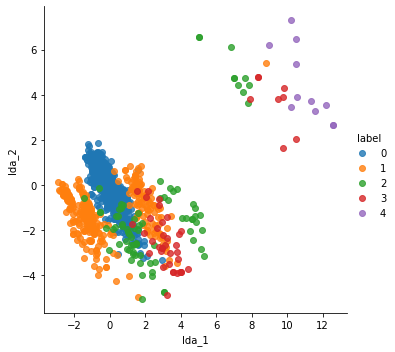

In [12]:
X_train_lda=pd.DataFrame(X_train_lda).loc[:,0:1]
X_train_lda=pd.concat((X_train_lda, y_label), axis=1) 
X_train_lda.columns=['lda_1', 'lda_2', 'label']
X_train_lda

sns.lmplot(x='lda_1',y='lda_2',data=X_train_lda,hue='label',fit_reg=False)
plt.show()

## 우리가 원하는 정답 모양
## 캠페인 참여에서의 총 참여 횟수를 라벨값으로 둔 상태에서의 데이터 분포도

###K-means Clustering

클러스터링을 돌려 보는 데에 의의가 있기에, 파라미터 값 최적화보다는 각 알고리즘을 사용하면 결과가 어떻게 달라지는 지에 초점을 맞추어 살펴봅니다. 여러 번 시행해보면서 **자유롭게 파라미터를 정해주세요**.

**(직접 최적의 파라미터 값을 찾아서 설정하고 싶으시다면 훨씬 좋습니다! 해당 과제의 모든 코드는 기본 뼈대일 뿐입니다. 코드를 추가 또는 변경하셔도 좋습니다.)**

다른 x값들에 대해서도 캠페인 참여도, 즉 고객의 충실도를 잘 군집화할 수 있을까요? 클러스터링으로 결과를 확인해봅시다.



---





K-means를 이용하여 클러스터링 해봅시다.

In [13]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import KMeans

In [14]:
km = KMeans(n_clusters=5)

y_km = km.fit_predict(X_features_scaling)
y_km

array([0, 4, 0, ..., 2, 0, 4], dtype=int32)

In [15]:
X_train_lda['K_means'] = y_km

####시각화

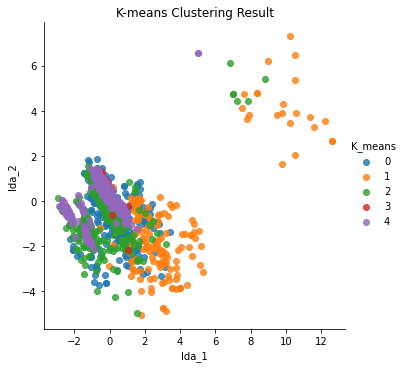

In [16]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'K_means', fit_reg = False)
plt.title('K-means Clustering Result')
plt.show()

###Hierarchical Clustering

Agglomerative 방법을 이용하여 클러스터링 해봅시다.

In [17]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import AgglomerativeClustering

In [18]:
## 클러스터 수는 ########(숫자)########로 설정하고, Agglomerative를 활용하여 예측된 y값을 만들어 봅시다.

agghc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_agghc = agghc.fit_predict(X_features_scaling)

In [19]:
X_train_lda['hierarchical'] = y_agghc

####시각화

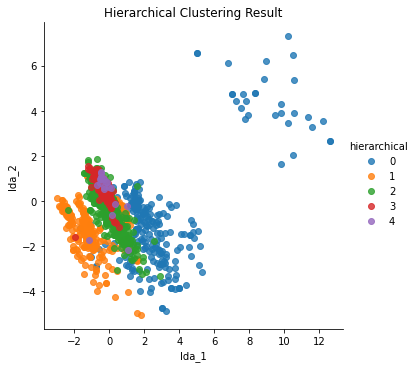

In [20]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'hierarchical', fit_reg = False)
plt.title('Hierarchical Clustering Result')
plt.show()

###DBSCAN

DBSCAN을 이용하여 클러스터링 해봅시다.

In [21]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import DBSCAN

In [40]:
## eps는 ########(숫자)########, minPts는 ########(숫자)########로 설정한 뒤 DBSCAN를 활용하여 예측된 y값을 만들어 봅시다.

dbscan=DBSCAN(eps=0.7, min_samples=4, metric='euclidean') #eps는 0-1
y_dbscan=dbscan.fit_predict(X_features_scaling)


In [41]:
X_train_lda['dbscan'] = y_dbscan

####시각화

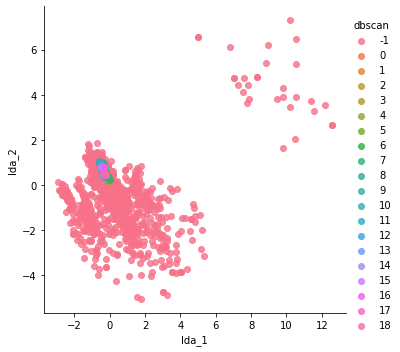

In [42]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'dbscan', fit_reg = False)
plt.show()

###Validation

실루엣 계수를 사용하여 각 클러스터링의 성능을 평가해봅시다.



---



(Q) 실루엣 계수로 평가하기 전에, 육안 상으로 어떠한 알고리즘의 성능이 제일 높아 보이며 어떠한 알고리즘의 성능이 제일 낮아 보이는지 의견을 적어주세요.

DBSCAN은 해당 데이터셋에 부적절한 군집화 방법인 것으로 보이며, k-means와 hierarchical 방법은 LDA 결과와 유사하게 나오는 것으로 보아 캠페인 총 참여횟수(=고객의 충실도)를 잘 반영한 것으로 보인다.



---



이제 실루엣 계수로 성능을 평가해 봅시다!

In [27]:
## 필요한 라이브러리를 임포트합니다.

import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

K-means Clustering의 실루엣 계수입니다.

In [28]:
coef_km = metrics.silhouette_score(X_features_scaling, y_km)
print('Silhouette score is {}.'.format(coef_km))

Silhouette score is 0.19931770433020093.


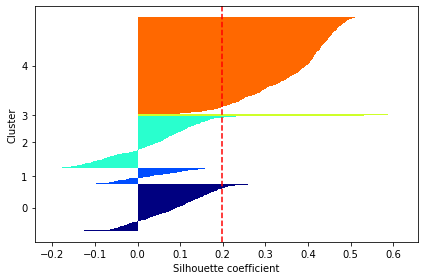

In [52]:
# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(X_features_scaling,y_km, metric='euclidean')

# Ploting
from matplotlib import cm
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
          color="red",
          linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

Hierarchical Clustering의 실루엣 계수입니다.

In [29]:
## Hierarchical Clustering

coef_hc = metrics.silhouette_score(X_features_scaling, y_agghc)
print('Silhouette score is {}.'.format(coef_hc))

Silhouette score is 0.17393367899599174.


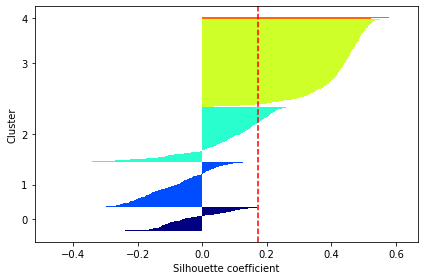

In [53]:
# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(X_features_scaling,y_agghc, metric='euclidean')

# Ploting
from matplotlib import cm
cluster_labels = np.unique(y_agghc)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_agghc == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
          color="red",
          linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

DBSCAN의 실루엣 계수입니다.

In [43]:
## DBSCAN
coef_db = metrics.silhouette_score(X_features_scaling, y_dbscan)
print('Silhouette score is {}.'.format(coef_db))

Silhouette score is -0.29075693438763095.


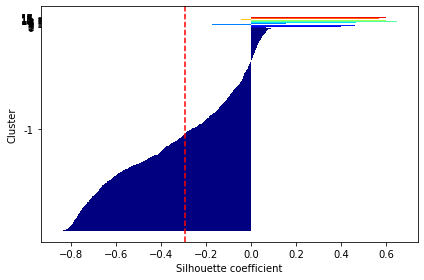

In [54]:
# Evaluating silhouette coefficients
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(X_features_scaling,y_dbscan, metric='euclidean')

# Ploting
from matplotlib import cm
cluster_labels = np.unique(y_dbscan)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_dbscan == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

# Ploting average of silhouette coefficients
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
          color="red",
          linestyle="--")

# Layout
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

(Q) 실루엣 계수를 기반으로, 클러스터링 알고리즘의 성능을 높은 순대로 적어주세요.

K-means > Hierarchical > DBSCAN 순서로 클러스터링이 잘 되었다.

(Q) 클러스터링 결과에 대한 해석을 적어주세요. (참고로, 실루엣 계수는 -1에서 1 사이의 값을 가집니다.)

(Q) 마케팅 캠페인과 관련하여 도출할 수 있는 인사이트를 적어주세요.

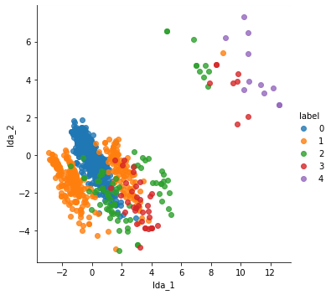
마케팅 총 참여횟수를 고객의 충실도라고 보았을때 결과

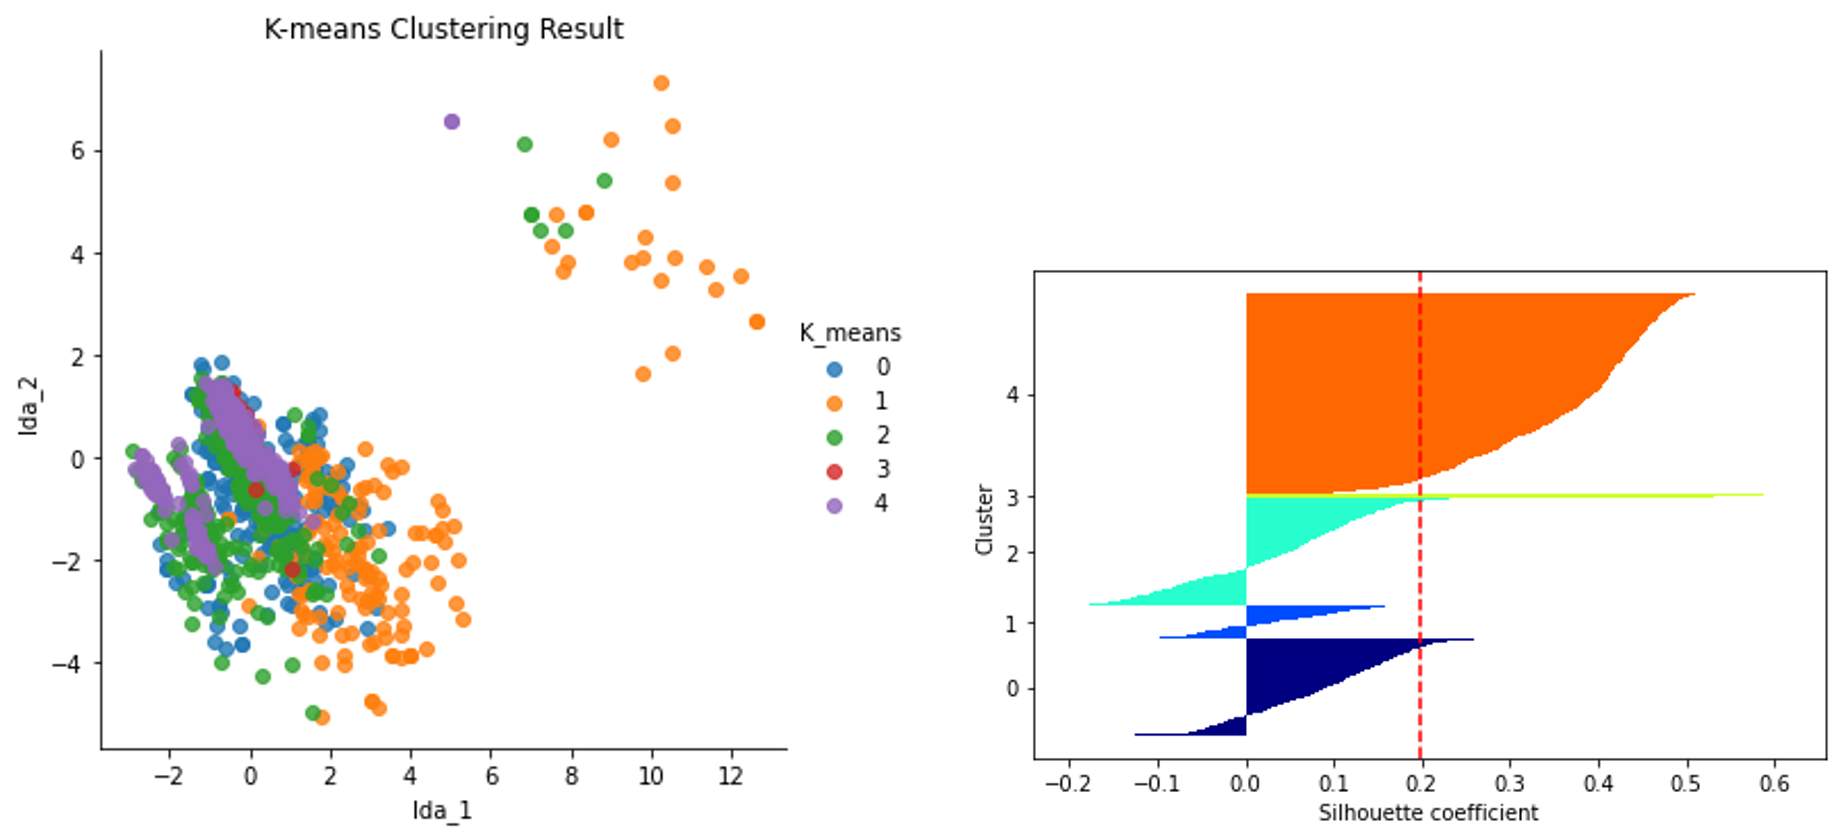

전체적인 실루엣계수는 0.2의 값을 보이지만, 개별적인 데이터포인트들의 실루엣 계수를 보면 다음과 같다. 4번 그룹에 대해서는 clustering이 잘 되었지만, 나머지 그룹들은 실루엣 계수가 음수인 것들도 보이면서 그다지 잘 되었다고 볼 수는 없다. 4번 그룹은 기존의 LDA 결과와 비교해보면 비교적 충실도가 낮은(마케팅 참여 횟수가 적은) 사람들인 것으로 보인다. 따라서, 이와 같은 군집화를 통해 충실도가 낮은 사람들을 걸러내는 것은 쉽지만, 그 외의 기업이 집중해야할 main 타겟층을 뽑기 위해서는 부적절하다.

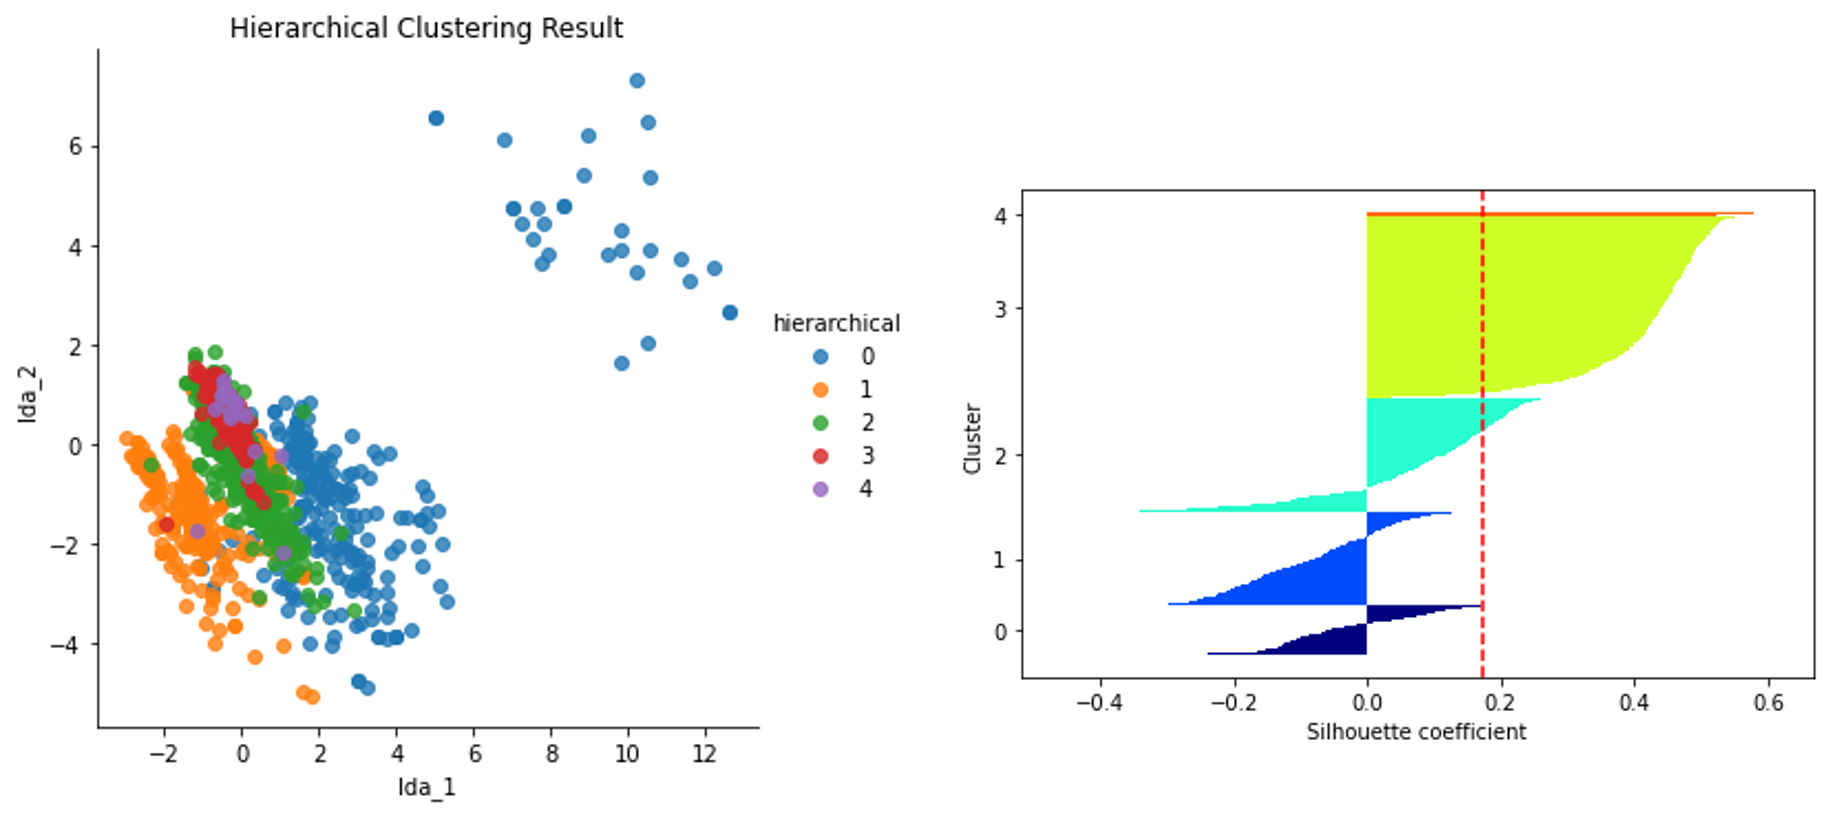

Hierarchical clustering 역시 3번, 4번 클러스터에 대해서는 제대로 clustering이 이루어졌지만, 0-2번 클러스터는 제대로 된 결과라고 보기는 힘들다. 3-4번 cluster는 LDA 결과와 비교해보면 비교적 기업에 대한 충실도가 낮은 고객들이고, 메인 고객층을 판단하기에는 부적절하다. 기업이 집중해야할 메인 집단을 알기 위해서는 클러스터링이 아니라 이상치 탐지의 방법이 더 적절할 것으로 보인다.